In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# generate some lognormally distributed data with known values of mu and sigma

from scipy.stats import lognorm
true_mu = 1.0
true_sigma = 1.0
n_points = 35000

# and sort it
X = np.sort(lognorm.rvs(true_mu,true_sigma,size=n_points))

In [1]:
import pandas as pd
from pandas import DataFrame

In [1]:
DLBCL = pd.read_csv("DLBCL.GCB1.cts.csv")
X2 = np.array(DLBCL[["i"]])


NameError: name 'pd' is not defined

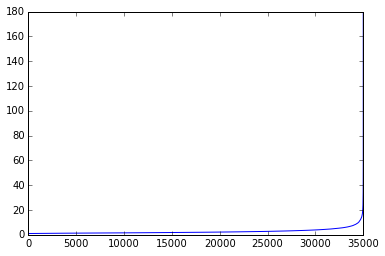

In [37]:
# plot sorted datapoints
plt.plot(X)


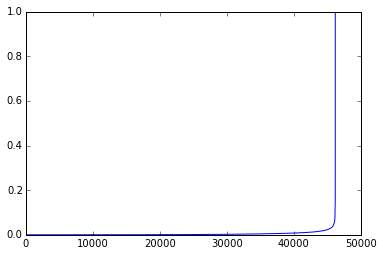

In [38]:
# plot sorted datapoints

plt.plot(X2)

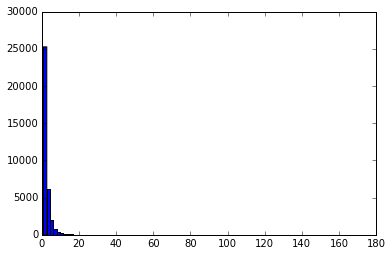

In [40]:
# plot histogram
plt.hist(X,bins=100);

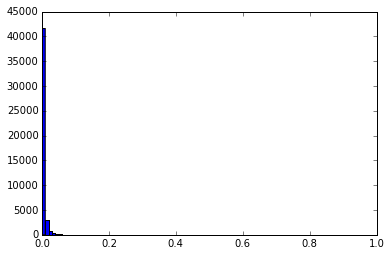

In [41]:
# plot histogram
plt.hist(X2,bins=100);

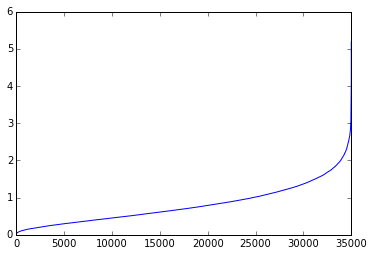

In [42]:
# plot log-transformed data
plt.plot(np.log(X))

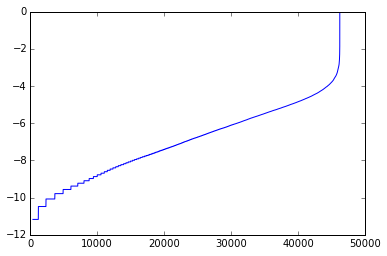

In [43]:
# plot log-transformed data
plt.plot(np.log(X2))

In [44]:
# let's be Bayesian! 
# this requires us to define a probability model

def parse_params(theta):
    ''' convert a parameter vector theta into a dictionary associating parameter names to their values '''
    params = dict()
    params['mu'] = theta[0]
    params['sigma'] = theta[1]
    return params

# first let's define a prior
def log_prior(theta):
    ''' improper prior, but fine for our purposes: flat over all mu, flat over positive sigma'''
    params = parse_params(theta)
    if (params['sigma'] <= 0):
        return -np.inf
    return 0

# now let's define the likelihood function
def log_likelihood(theta):
    ''' assuming i.i.d. so the likelihood factors...'''
    params = parse_params(theta)
    mu = params['mu']
    sigma = params['sigma']
    lls = lognorm.logpdf(X,mu,sigma)
    ll = np.sum(lls)
    if np.isnan(ll):
        return -np.inf
    return ll

# posterior propto prior * likelihood
def log_posterior(theta):
    return log_prior(theta) + log_likelihood(theta)

In [45]:
%%time

# run MCMC
import emcee
n_walkers = 50
initial_walkers = [np.random.rand(2) for _ in range(n_walkers)]

sampler = emcee.EnsembleSampler(n_walkers,2,log_posterior)
result = sampler.run_mcmc(initial_walkers,100)

CPU times: user 10.7 s, sys: 99.3 ms, total: 10.8 s
Wall time: 10.8 s


In [46]:
# plot samples
import triangle
samples = sampler.flatchain

triangle.corner(samples,
                labels=[r'$\mu$',r'$\sigma$'],
                truths=[true_mu,true_sigma],
                extents=[(0,1.2),(0,1.2)])

# most of the posterior probability is concentrated on the true values (mu=1.0,sigma=1.0)

AttributeError: 'module' object has no attribute 'corner'